<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Regression-Analysis/Heart_Failure_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Analysis | Matthew Tello, Emily Morales, Joseph Delgadillo

In [ ]:

#Determining Heart failure - there are four independent variables: anaemia, diabetes, high_blood_pressure, and smoking
#and one dependent variable - Heart Failure(1) or not(0).

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_set=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
data_set

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#'anaemia' (column#0) are the four independent variables and 'diabetes' (column#3) and 'high_blood_pressure'(column#5) 'smoking' (column#10)
#and 'DEATH_EVENT'(column#12) is the dependent variable
x=data_set.iloc[:,[0,3,5,10]].values
y=data_set.iloc[:,12].values


In [ ]:
#splitting the dataset into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

In [ ]:

from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


In [ ]:
#fitting logistic regression to the training set

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#For more info on the LogitsticRegression and its parameters, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#andom_state: Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. 
#Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
#The passed value will have an effect on the reproducibility of the results returned by the function

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None, max_iter=100,
                   multi_class='warn',n_jobs=None,penalty=12,
                   random_state=0,solver='warn',tol=0.0001,verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty=12, random_state=0,
                   solver='warn')

In [ ]:
#predicting the test set result
y_pred=classifier.predict(x_test)


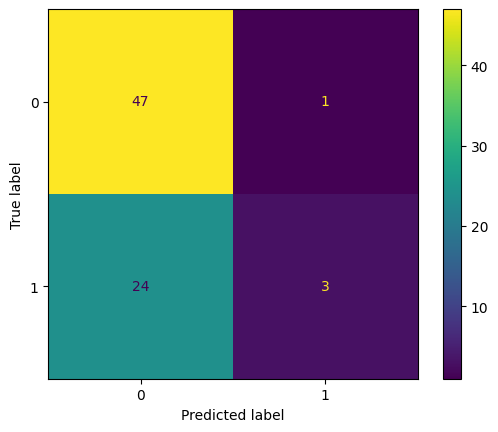

In [ ]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that 4+2= 6 (Correct Output) and 0+0= 0(Incorrect Output).